In [1]:
from glob import glob
import pickle as p
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
FINAL_NBP_RECORDS_FILENAME = "saved/NBP_73812_records.p"
FINAL_EBP_RECORDS_FILENAME = "saved/EBP_4612_records.p"
FINAL_FMP_RECORDS_FILENAME = "saved/FMP_4612_records.p"

NBP_BATCH_SIZE = 8
EBP_BATCH_SIZE = 128
FMP_BATCH_SIZE = 128

In [3]:
def compile_records(records_filename, batch_size):
    """
    Args:
        records_filename (string): name of file that has records
        batch_size (int): batch size per training step
    
    Returns:
        training_points (numpy array): array of the training points that saves occurred at
        val_class_losses (numpy array): array of the validation class losses at each save
        val_normal_losses (numpy array): array of the validation normal losses at each save
        training_class_losses (numpy array): array of the training class losses at each save
        training_normal_losses (numpy array): array of the training normal losses at each save
    """
    with open(records_filename, "rb") as f:
        records = p.load(f)
        
    num_saved = len(records)
    
    training_points = np.zeros(num_saved, dtype=np.int)
    val_class_losses = np.zeros(num_saved)
    val_normal_losses = np.zeros(num_saved)
    training_class_losses = np.zeros(num_saved)
    training_normal_losses = np.zeros(num_saved)
    
    for i, record in enumerate(records):
        training_points[i] = record["global_step"] * batch_size
        val_class_losses[i] = record["val_class_loss"]
        val_normal_losses[i] = record["val_normals_loss"]
        training_class_losses[i] = record["train_class_loss"]
        training_normal_losses[i] = record["train_normals_loss"]
        
    return training_points, val_class_losses, val_normal_losses,\
        training_class_losses, training_normal_losses

In [4]:
# Compile records for each training stage
nbp_training_points, nbp_val_class_losses, nbp_val_normal_losses,\
    nbp_training_class_losses, nbp_training_normal_losses =\
        compile_records(FINAL_NBP_RECORDS_FILENAME, NBP_BATCH_SIZE)

ebp_training_points, ebp_val_class_losses, ebp_val_normal_losses,\
    ebp_training_class_losses, ebp_training_normal_losses =\
        compile_records(FINAL_EBP_RECORDS_FILENAME, EBP_BATCH_SIZE)

fmp_training_points, fmp_val_class_losses, fmp_val_normal_losses,\
    fmp_training_class_losses, fmp_training_normal_losses =\
        compile_records(FINAL_FMP_RECORDS_FILENAME, FMP_BATCH_SIZE)

# Compile record compilations
num_nbp = len(nbp_training_points)
num_ebp = len(ebp_training_points)
num_fmp = len(fmp_training_points)
num_all = num_nbp + num_ebp + num_fmp

total_nbp_tp = nbp_training_points[-1]
total_ebp_tp = ebp_training_points[-1]

all_training_points = np.zeros(num_all, dtype=np.int)
all_training_points[:num_nbp] = nbp_training_points
all_training_points[num_nbp:(num_nbp+num_ebp)] = ebp_training_points + total_nbp_tp
all_training_points[(num_nbp+num_ebp):] = fmp_training_points + total_nbp_tp + total_ebp_tp

all_val_class_losses = np.zeros(num_all)
all_val_class_losses[:num_nbp] = nbp_val_class_losses
all_val_class_losses[num_nbp:(num_nbp+num_ebp)] = ebp_val_class_losses
all_val_class_losses[(num_nbp+num_ebp):] = fmp_val_class_losses

all_val_normal_losses = np.zeros(num_all)
all_val_normal_losses[:num_nbp] = nbp_val_normal_losses
all_val_normal_losses[num_nbp:(num_nbp+num_ebp)] = ebp_val_normal_losses
all_val_normal_losses[(num_nbp+num_ebp):] = fmp_val_normal_losses

all_training_class_losses = np.zeros(num_all)
all_training_class_losses[:num_nbp] = nbp_training_class_losses
all_training_class_losses[num_nbp:(num_nbp+num_ebp)] = ebp_training_class_losses
all_training_class_losses[(num_nbp+num_ebp):] = fmp_training_class_losses

all_training_normal_losses = np.zeros(num_all)
all_training_normal_losses[:num_nbp] = nbp_training_normal_losses
all_training_normal_losses[num_nbp:(num_nbp+num_ebp)] = ebp_training_normal_losses
all_training_normal_losses[(num_nbp+num_ebp):] = fmp_training_normal_losses

all_val_total_losses = all_val_class_losses + all_val_normal_losses
all_training_total_losses = all_training_class_losses + all_training_normal_losses

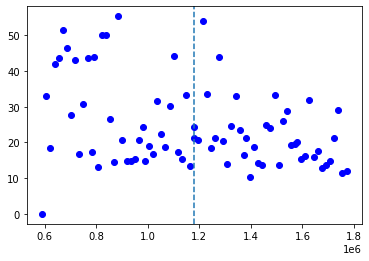

In [5]:
x = all_training_points[num_nbp:]
y = all_val_class_losses[num_nbp:]

plt.plot(x, y, 'bo')
plt.axvline(x=total_nbp_tp+total_ebp_tp, linestyle="--")

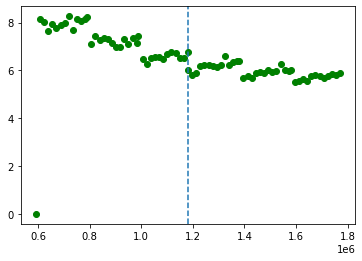

In [6]:
x = all_training_points[num_nbp:]
y = all_training_class_losses[num_nbp:]

plt.plot(x, y, 'go')
plt.axvline(x=total_nbp_tp+total_ebp_tp, linestyle="--")

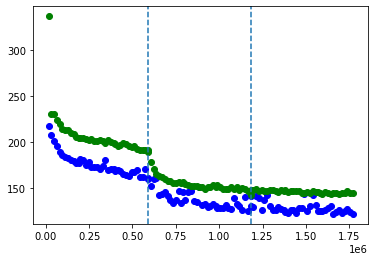

In [7]:
x = all_training_points[1:]
y1 = all_val_normal_losses[1:]
y2 = all_training_normal_losses[1:]

plt.plot(x, y1, 'bo')
plt.plot(x, y2, 'go')
plt.axvline(x=total_nbp_tp, linestyle="--")
plt.axvline(x=total_nbp_tp+total_ebp_tp, linestyle="--")

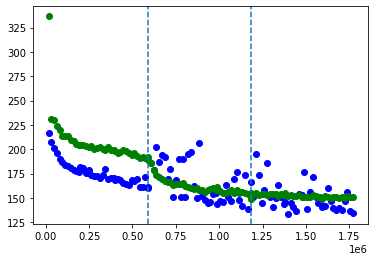

In [10]:
x = all_training_points[1:]
y1 = all_val_total_losses[1:]
y2 = all_training_total_losses[1:]

plt.plot(all_training_points[1:], all_val_total_losses[1:], 'bo')
plt.plot(all_training_points[1:], all_training_total_losses[1:], 'go')
plt.axvline(x=total_nbp_tp, linestyle="--")
plt.axvline(x=total_nbp_tp+total_ebp_tp, linestyle="--")